# Importing Libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import cv2
import sklearn as sk
import random
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import TensorBoard
import time
from sklearn.utils.class_weight import compute_class_weight

# Defining Lists and Checking Image Data:

[[161 161 162 ... 158 157 157]
 [161 161 161 ... 157 157 156]
 [160 160 161 ... 156 155 155]
 ...
 [169 171 176 ... 141 142 143]
 [164 167 172 ... 138 139 140]
 [162 164 170 ... 136 138 139]]


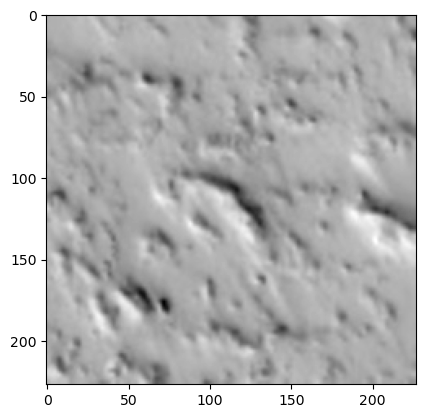

In [6]:
path = "/Users/computername/Downloads/hirise-map-proj-v3_2/map-proj-v3_2"
categories = ["Other", "Crater", "Dark Dune", "Slope Streak", "Bright Dune", "Impact Ejecta", "Swiss Cheese", "Spider"]
txtFilePath = "/Users/computername/Downloads/hirise-map-proj-v3_2/labels-map-proj_v3_2.txt"
imgFileName = []
categoriesImg = []

#Define path and lists

with open(txtFilePath, 'r') as file:
    for line in file:
        last_character = line.strip()[-1]
        categoriesImg.append(last_character)
        imgFile = line[:-3]
        imgFileName.append(imgFile)
#Append the image file name and category of each image into the respective lists.

#The for loop below iterates through each image and uses matplotlib to show the image in grayscale
#It only shows one image because of the break command

for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    print(img_array)
    plt.imshow(img_array, cmap = "gray")
    plt.show()
    break



# Creating Training/Validation Data:

In [7]:
trainingDataImages = []
trainingDataCategories = []
validationDataImages = []
validationDataCategories = []



#Define training data and validation data below

def createTrainingData():
    i = 0
    for img in os.listdir(path):
        while len(trainingDataImages) < 38968:
            img_array = cv2.imread(os.path.join(path, imgFileName[i]), cv2.IMREAD_GRAYSCALE)
            trainingDataImages.append(img_array)
            trainingDataCategories.append(categoriesImg[i])
            i += 1
        while len(trainingDataImages) == 38968 and i<(len(imgFileName)-1):
            img_array = cv2.imread(os.path.join(path, imgFileName[i]), cv2.IMREAD_GRAYSCALE)
            validationDataImages.append(img_array)
            validationDataCategories.append(categoriesImg[i])
            i += 1


createTrainingData()

trainingData = list(zip(trainingDataImages, trainingDataCategories))
validationData = list(zip(validationDataImages, validationDataCategories))
print(trainingData[0])
print(validationData[0])

(array([[198, 195, 192, ..., 169, 170, 171],
       [193, 192, 193, ..., 181, 178, 176],
       [179, 184, 193, ..., 199, 194, 190],
       ...,
       [190, 189, 185, ...,   0,   0,   0],
       [191, 189, 186, ...,   0,   0,   0],
       [191, 190, 186, ...,   0,   0,   0]], dtype=uint8), '7')
(array([[135, 150, 144, ..., 126, 102, 106],
       [145, 145, 136, ..., 103,  78,  98],
       [150, 144, 131, ...,  91,  79, 116],
       ...,
       [120, 114, 115, ..., 116, 124, 122],
       [126, 117, 113, ..., 130, 138, 134],
       [136, 126, 116, ..., 129, 135, 130]], dtype=uint8), '0')


# Checking Length of Training/Validation Data:

In [9]:
#testing to make sure that ratio of training data and validation data is correct
print(len(trainingDataImages))
print(len(validationDataImages))

38968
25978


# Checking Elements of Training/Validation Data:

In [10]:
#testing to make sure the correct data is stored in the training and validation lists
print(trainingDataImages[1000])
print(trainingDataCategories[1000])
#print(trainingDataCategories[4568])
print(validationDataImages[555])
print(trainingDataCategories[555])
#print(validationDataCategories[10022])

[[107 104 103 ... 107 109 111]
 [106 105 105 ... 108 110 112]
 [104 104 105 ... 109 111 112]
 ...
 [ 80  81  80 ... 117 111 108]
 [ 79  80  78 ... 114 109 106]
 [ 80  79  76 ... 113 108 106]]
5
[[ 67  65  53 ...  82  73  68]
 [ 73  69  58 ...  77  67  61]
 [ 84  79  68 ...  67  57  49]
 ...
 [ 66  69  72 ... 102 116 121]
 [ 60  64  68 ...  83 103 115]
 [ 55  60  66 ...  69  96 113]]
1


# Defining Convolutional Neural Network Framework:

In [11]:
new_input_shape = (227, 227, 1)

new_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation="relu", input_shape=new_input_shape),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    
    tf.keras.layers.Conv2D(128, (3,3), padding = 'same', activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    
    tf.keras.layers.Conv2D(128, (3,3), padding = 'same', activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    
    tf.keras.layers.Conv2D(128, (3,3), padding = 'same', activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2), strides=2), 
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(64, activation="relu"),
    
    tf.keras.layers.Dense(8, activation="softmax")
])

new_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 227, 227, 128)     1280      
                                                                 
 max_pooling2d (MaxPooling2  (None, 113, 113, 128)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 113, 113, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 128)       0

# Assigning Weights and Defining Parameters for the Model

In [12]:
dense_layer = 1
conv_layer = 5
layer_sizeConv = 128
layer_sizeDense = 64
ratioTraining = 0.6
batchSize = 32
epochs = 15

NAME = "Mars-Imagery-Classification-ratioTraining-{}-conv-{}-dense-{}-layer_sizeConv-{}-layer_sizeDense-{}-batchSize-{}-epochs-{}".format(ratioTraining, conv_layer, dense_layer, layer_sizeConv, layer_sizeDense, batchSize, epochs, int(time.time()))
tensorboard = TensorBoard(log_dir = 'logs/{}'.format(NAME))

batch_size = 32

def classWeightCalculation(y):
    classes = np.unique(y)
    classWeights = compute_class_weight(class_weight='balanced', classes=classes, y=y)
    classes = classes.astype(int)
    classWeightsDict = {label: weight for label, weight in zip(classes, classWeights)}
    return classWeightsDict

classWeights = classWeightCalculation(trainingDataCategories)
    
    

trainingDataImages = np.array(trainingDataImages)
trainingDataCategories = np.array(trainingDataCategories)
validationDataImages = np.array(validationDataImages)
validationDataCategories = np.array(validationDataCategories)


trainingDataCategories = to_categorical(trainingDataCategories, num_classes=8)
validationDataCategories = to_categorical(validationDataCategories, num_classes=8)



new_model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
                  metrics=['accuracy'])

history = new_model.fit(x = trainingDataImages,  
                        y = trainingDataCategories,
                        batch_size=batch_size,
                        epochs=15,
                        validation_data=(validationDataImages, validationDataCategories), 
                        class_weight=classWeights,
                        callbacks = [tensorboard])


Epoch 1/15
1218/1218 [==============================] - 4988s 4s/step - loss: 2.0965 - accuracy: 0.1156 - val_loss: 2.0462 - val_accuracy: 0.0328
Epoch 2/15
1218/1218 [==============================] - 4906s 4s/step - loss: 1.7569 - accuracy: 0.1616 - val_loss: 1.8007 - val_accuracy: 0.1279
Epoch 3/15
1218/1218 [==============================] - 4851s 4s/step - loss: 1.3169 - accuracy: 0.3165 - val_loss: 2.0463 - val_accuracy: 0.1518
Epoch 4/15
1218/1218 [==============================] - 4862s 4s/step - loss: 0.9805 - accuracy: 0.5204 - val_loss: 1.8083 - val_accuracy: 0.3310
Epoch 5/15
1218/1218 [==============================] - 4871s 4s/step - loss: 0.7390 - accuracy: 0.5985 - val_loss: 1.5924 - val_accuracy: 0.4389
Epoch 6/15
1218/1218 [==============================] - 4897s 4s/step - loss: 0.5476 - accuracy: 0.6481 - val_loss: 1.2477 - val_accuracy: 0.5772
Epoch 7/15
1218/1218 [==============================] - 4945s 4s/step - loss: 0.4765 - accuracy: 0.6731 - val_loss: 1.4714 -

# Testing Multiple Models:

In [ ]:
dense_layers = [1, 2, 3]
layer_sizes = [32, 64, 128]
conv_layers = [4, 5, 6]

batch_size = 32

def classWeightCalculation(y):
    classes = np.unique(y)
    classWeights = compute_class_weight(class_weight='balanced', classes=classes, y=y)
    classes = classes.astype(int)
    classWeightsDict = {label: weight for label, weight in zip(classes, classWeights)}
    return classWeightsDict

classWeights = classWeightCalculation(trainingDataCategories)
    
    

trainingDataImages = np.array(trainingDataImages)
trainingDataCategories = np.array(trainingDataCategories)
validationDataImages = np.array(validationDataImages)
validationDataCategories = np.array(validationDataCategories)

trainingDataCategories = to_categorical(trainingDataCategories, num_classes=8)
validationDataCategories = to_categorical(validationDataCategories, num_classes=8)

new_input_shape = (227, 227, 1)



for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "Mars-Imagery-Classification-dense-{}-layer-{}-conv-{}".format(dense_layer, layer_size, conv_layer,int(time.time()))
            tensorboard = TensorBoard(log_dir = 'logs/{}'.format(NAME))

            new_model = tf.keras.Sequential([
                tf.keras.layers.Conv2D(layer_size, (3, 3), padding='same', activation="relu", input_shape=new_input_shape),
                tf.keras.layers.MaxPooling2D((2, 2), strides=2),
                ])
            
            for i in range(conv_layer-1):
                new_model.add(tf.keras.layers.Conv2D(layer_size, (3, 3), padding='same', activation="relu"))
                new_model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=2))
                
            new_model.add(tf.keras.layers.Flatten())
                
            for i in range(dense_layer):
                new_model.add(tf.keras.layers.Dense(layer_size, activation="relu"))
            
            new_model.add(tf.keras.layers.Dense(8, activation="softmax"))


            new_model.compile(optimizer='adam',
                          loss=tf.keras.losses.CategoricalCrossentropy(),
                              metrics=['accuracy'])

            history = new_model.fit(trainingDataImages, trainingDataCategories, class_weight = classWeights, batch_size=batch_size, epochs=10, validation_data=(validationDataImages, validationDataCategories), callbacks =[tensorboard])


In [78]:
dense_layer = 1
conv_layer = 5
layer_sizeConv = 128
layer_sizeDense = 64
ratioTraining = 0.6
batchSize = 32

NAME = "Mars-Imagery-Classification-ratioTraining-{}-conv-{}-dense-{}-layer_sizeConv-{}-layer_sizeDense-{}-batchSize-{}".format(ratioTraining, conv_layer, dense_layer, layer_sizeConv, layer_sizeDense, batchSize,int(time.time()))
tensorboard = TensorBoard(log_dir = 'logs/{}'.format(NAME))


batch_size = 32

def classWeightCalculation(y):
    classes = np.unique(y)
    classWeights = compute_class_weight(class_weight='balanced', classes=classes, y=y)
    classes = classes.astype(int)
    classWeightsDict = {label: weight for label, weight in zip(classes, classWeights)}
    return classWeightsDict

classWeights = classWeightCalculation(trainingDataCategories)
    
    

trainingDataImages = np.array(trainingDataImages)
trainingDataCategories = np.array(trainingDataCategories)
validationDataImages = np.array(validationDataImages)
validationDataCategories = np.array(validationDataCategories)


trainingDataCategories = to_categorical(trainingDataCategories, num_classes=8)
validationDataCategories = to_categorical(validationDataCategories, num_classes=8)



new_model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
                  metrics=['accuracy'])

history = new_model.fit(x = trainingDataImages,  # x: input data
                        y = trainingDataCategories,        # y: target data (labels), it seems you are not specifying this here
                        batch_size=batch_size,
                        epochs=10,
                        validation_data=(validationDataImages, validationDataCategories),  # validation data tuple (x_val, y_val)
                        class_weight=classWeights,
                        callbacks = [tensorboard])

#history = new_model.fit(trainingDataImages, trainingDataCategories, class_weight = classWeights, batch_size=batch_size, epochs=1, validation_data=(validationDataImages, validationDataCategories))

Epoch 1/10
1218/1218 [==============================] - 5012s 4s/step - loss: 2.1309 - accuracy: 0.0967 - val_loss: 2.0333 - val_accuracy: 0.0087
Epoch 2/10
1218/1218 [==============================] - 4863s 4s/step - loss: 2.0513 - accuracy: 0.0407 - val_loss: 2.0260 - val_accuracy: 0.0361
Epoch 3/10
1218/1218 [==============================] - 4838s 4s/step - loss: 1.6974 - accuracy: 0.1451 - val_loss: 1.9622 - val_accuracy: 0.1905
Epoch 4/10
1218/1218 [==============================] - 4837s 4s/step - loss: 1.2626 - accuracy: 0.3825 - val_loss: 2.1038 - val_accuracy: 0.1674
Epoch 5/10
1218/1218 [==============================] - 4845s 4s/step - loss: 0.8925 - accuracy: 0.5425 - val_loss: 1.3918 - val_accuracy: 0.4978
Epoch 6/10
1218/1218 [==============================] - 4824s 4s/step - loss: 0.6480 - accuracy: 0.6171 - val_loss: 1.3128 - val_accuracy: 0.5422
Epoch 7/10
1218/1218 [==============================] - 4832s 4s/step - loss: 0.5229 - accuracy: 0.6515 - val_loss: 1.3692 -

In [80]:
history_additional = new_model.fit(x=trainingDataImages,
                                   y=trainingDataCategories,
                                   batch_size=batch_size,
                                   epochs=5,
                                   validation_data=(validationDataImages, validationDataCategories),
                                   class_weight=classWeights,
                                   callbacks = [tensorboard])

Epoch 1/5
1218/1218 [==============================] - 4947s 4s/step - loss: 0.2455 - accuracy: 0.7731 - val_loss: 1.3412 - val_accuracy: 0.5989
Epoch 2/5
1218/1218 [==============================] - 4894s 4s/step - loss: 0.2355 - accuracy: 0.7851 - val_loss: 1.1791 - val_accuracy: 0.6798
Epoch 3/5
1218/1218 [==============================] - 4949s 4s/step - loss: 0.2067 - accuracy: 0.8077 - val_loss: 1.0438 - val_accuracy: 0.7246
Epoch 4/5
1218/1218 [==============================] - 4938s 4s/step - loss: 0.1766 - accuracy: 0.8284 - val_loss: 1.2494 - val_accuracy: 0.6715
Epoch 5/5
1218/1218 [==============================] - 4913s 4s/step - loss: 0.1771 - accuracy: 0.8336 - val_loss: 1.0659 - val_accuracy: 0.7033
